In [14]:
## Import all relevant libraries
import sys
import networkx as nx 
import numpy as np
import seaborn as sns
import random
import time 
from portrait_divergence import portrait_divergence

In [8]:
## Import all ELD functions
from ELD import compute_ELD, create_ELD_distance_matrix, compute_ELD_fast, create_ELD_distance_matrix_fast

In [21]:
## Setup Experiment 

# Create random ER and BA graphs with varying number of vertices 

random.seed(10)
np.random.seed(10)

num_samples = 10
ER_param = 0.03
BA_param = 3

vertList = [200, 400, 600, 800, 1000]

ERlist = []
BAlist = []

for num_vert in vertList:
    ER_sublist = []
    for i in range(0, num_samples):
        G1  = nx.erdos_renyi_graph(num_vert, ER_param)
        G2  = nx.erdos_renyi_graph(num_vert, ER_param)
        ER_sublist.append((G1, G2))

    BA_sublist = []
    for i in range(0, num_samples):
        G1 = nx.barabasi_albert_graph(num_vert, BA_param)
        G2 = nx.barabasi_albert_graph(num_vert, BA_param)
        BA_sublist.append((G1, G2))

    ERlist.append(ER_sublist)
    BAlist.append(BA_sublist)


In [22]:
## Run the actual experiment on the generated graphs

# There are four cases: 
# 1. ER Graphs: NPD vs ELD
# 2. BA Graphs: NPD vs ELD
 
NPDtimesER = []
ELDtimesER = []
NPDtimesBA = []
ELDtimesBA = []

K = 10 # ELD hyperparameter

for i in range(len(vertList)):

    start_time = time.time()
    for (G1, G2) in ERlist[i]:
        dist = portrait_divergence(G1, G2)
    runTime = time.time() - start_time
    print("--- %s seconds ---" % (runTime))
    NPDtimesER.append(runTime)

    start_time = time.time()
    for (G1, G2) in ERlist[i]:
        dist = compute_ELD(G1, G2, K)
    runTime = time.time() - start_time
    print("--- %s seconds ---" % (runTime))
    ELDtimesER.append(runTime)
    
    start_time = time.time()
    for (G1, G2) in BAlist[i]:
        dist = portrait_divergence(G1, G2)
    runTime = time.time() - start_time
    print("--- %s seconds ---" % (runTime))
    NPDtimesBA.append(runTime)
    
    start_time = time.time()
    for (G1, G2) in BAlist[i]:
        dist = compute_ELD(G1, G2, K)
    runTime = time.time() - start_time
    print("--- %s seconds ---" % (runTime))
    ELDtimesBA.append(runTime)

--- 1.8543591499328613 seconds ---
--- 0.10074186325073242 seconds ---
--- 1.8445348739624023 seconds ---
--- 0.11448407173156738 seconds ---
--- 5.720211982727051 seconds ---
--- 0.35117602348327637 seconds ---
--- 5.212345838546753 seconds ---
--- 0.30763697624206543 seconds ---
--- 12.477061986923218 seconds ---
--- 1.1866791248321533 seconds ---
--- 10.052940130233765 seconds ---
--- 0.686460018157959 seconds ---
--- 23.24862813949585 seconds ---
--- 2.1790051460266113 seconds ---
--- 16.15233087539673 seconds ---
--- 1.3386433124542236 seconds ---
--- 38.05455493927002 seconds ---
--- 4.2550368309021 seconds ---
--- 24.9290931224823 seconds ---
--- 2.4283199310302734 seconds ---


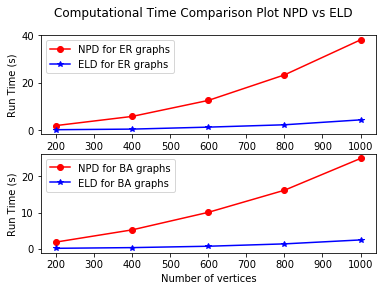

In [23]:
## Plot results in figure
from matplotlib import pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('Computational Time Comparison Plot NPD vs ELD')

ax1.plot(vertList, NPDtimesER, 'ro-')
ax1.plot(vertList, ELDtimesER, 'b*-')
ax1.set_ylabel('Run Time (s)')
ax1.set_xlabel('Number of vertices')
ax1.legend(["NPD for ER graphs", "ELD for ER graphs"])


ax2.plot(vertList, NPDtimesBA, 'ro-')
ax2.plot(vertList, ELDtimesBA, 'b*-')
ax2.set_xlabel('Number of vertices')
ax2.set_ylabel('Run Time (s)')
ax2.legend(["NPD for BA graphs", "ELD for BA graphs"])
plt.show()

fig.savefig("Computational Time Comparison.png")